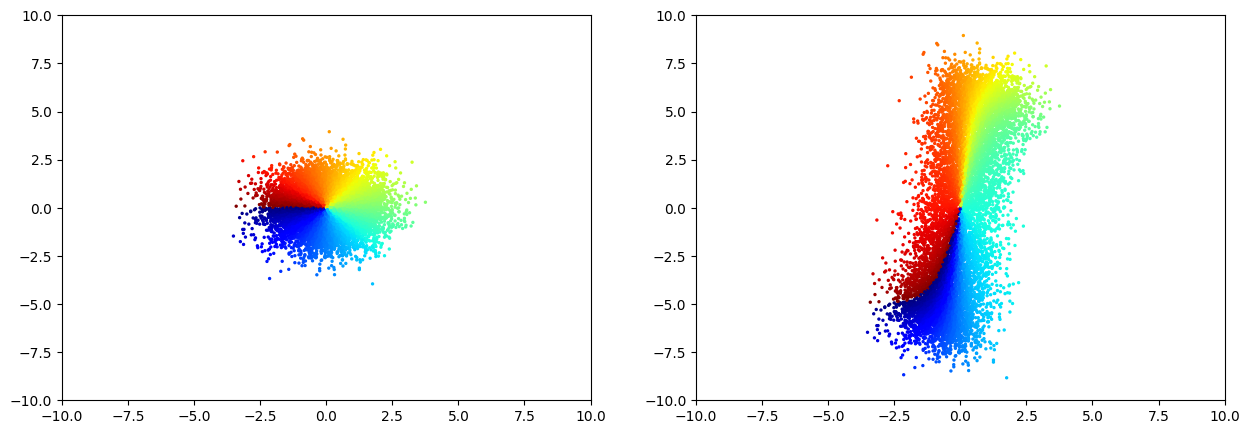

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

class H:
    def __init__(self):
        # 論文にあるようにwu>-1に注意
        self.w = np.array([1, 1])
        #self.w = np.random.randn(2)
        self.b = np.array([0])
        #self.b = np.random.randn(1)
        
    def h(self, z):
        return np.tanh(self.w.dot(z) + self.b)[0]

class PlanarFlow:
    def __init__(self):
        #self.u = np.random.randn(2)
        self.u = np.array([0, 5])
        self.h = H()
        
    def f(self, z):
        retVal = []
        
        for p in z:
            retVal.append(p + self.u * self.h.h(p))

        retVal = np.array(retVal)
        return retVal[:, 0].tolist(), retVal[:, 1].tolist()
    
pointNum = 10000
figRow = 1
figCol = 2
figNum = figRow * figCol

xs = [np.random.randn(pointNum)]
ys = [np.random.randn(pointNum)]
cs = []
alphaTmp = []

fig = plt.figure(figsize=(15,5))

for p in zip(xs[-1], ys[-1]):
    cs.append(np.arctan2(p[1], p[0]))
    alphaTmp.append(np.linalg.norm(p, ord=2))

maxAlpha = max(alphaTmp)
alphas = np.array(alphaTmp) / maxAlpha

f = []
for i in range(figNum):
    f.append(PlanarFlow())
    xsTmp, ysTmp = f[i].f(zip(xs[-1], ys[-1]))
    xs.append(xsTmp)
    ys.append(ysTmp)

ax = []
for i in range(figNum):
    ax.append(fig.add_subplot(figRow, figCol, i + 1))
    ax[i].scatter(xs[i], ys[i], c = cs, cmap = "jet", s = 2)
    ax[i].set_ylim(-10, 10)
    ax[i].set_xlim(-10, 10)
#    ax[i].scatter(xs[i], ys[i], c = cs, cmap = "jet", alpha = alphas, vmin = -np.pi, vmax = np.pi, s = 2)

# wの方向からすると黄色になるが、tanhなので黄色がすこし上にずれるのではないか。
# なにはともあれ、本にあるようにw^t z + b = 0に垂直な方向に収縮と拡大を繰り返すわけではない。

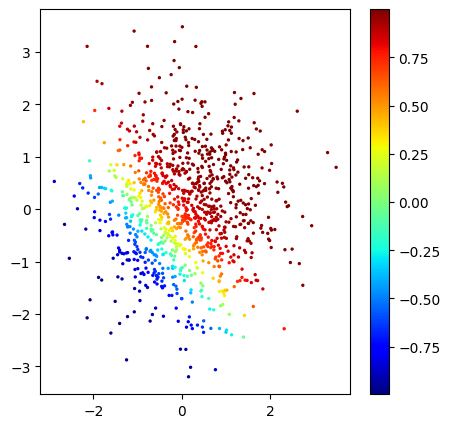

In [2]:
# まず、hの分布を書いてみましょう。
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

class H:
    def __init__(self):
        self.w = np.array([1, 1])
        #self.w = np.random.randn(2)
        self.b = np.array([1])
        #self.b = np.random.randn(1)
        
    def h(self, z):
        return np.tanh(self.w.dot(z) + self.b)[0]
    
pointNum = 1000
figRow = 1
figCol = 1
figNum = figRow * figCol

xs = [np.random.randn(pointNum)]
ys = [np.random.randn(pointNum)]

fig = plt.figure(figsize=(5,5))

f = []
h = H()

#for p in zip(xs[-1], ys[-1]):
#    print(p)
alphas = []
for p in zip(xs[0], ys[0]):
    alphas.append(h.h(p))

ax = []
scatters = []
for i in range(figNum):
    ax.append(fig.add_subplot(figRow, figCol, i + 1))
    scatters.append(ax[i].scatter(xs[i], ys[i], c = alphas, cmap = "jet", s = 2))
    fig.colorbar(scatters[i], ax=ax[i])


# wに対して、垂直な方向で値が等しくなる。
# wとzが直交していると値が0になる。→値が等しい。
# hがtanhなので、-1,1に近づくにつれ、変化が小さくなる。
